## Objective

The objective of this project is to build a Model that will help predict Diabetes using Medical & Demographic data.

## About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

Dataset link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

## Steps
- Import and install our dependencies
- Reading Our Dataset
- Data Processing and Qucik EDA
- Model Building using Artificial Neural Network (ANN)
- Model Evaluation

### Dependencies

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### Reading our dataset

In [2]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Data Processing

In [4]:
# Check for Duplicates and Nulls
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
dataset.duplicated().sum()

3854

In [6]:
# Removing duplicated values
df = dataset.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### EDA

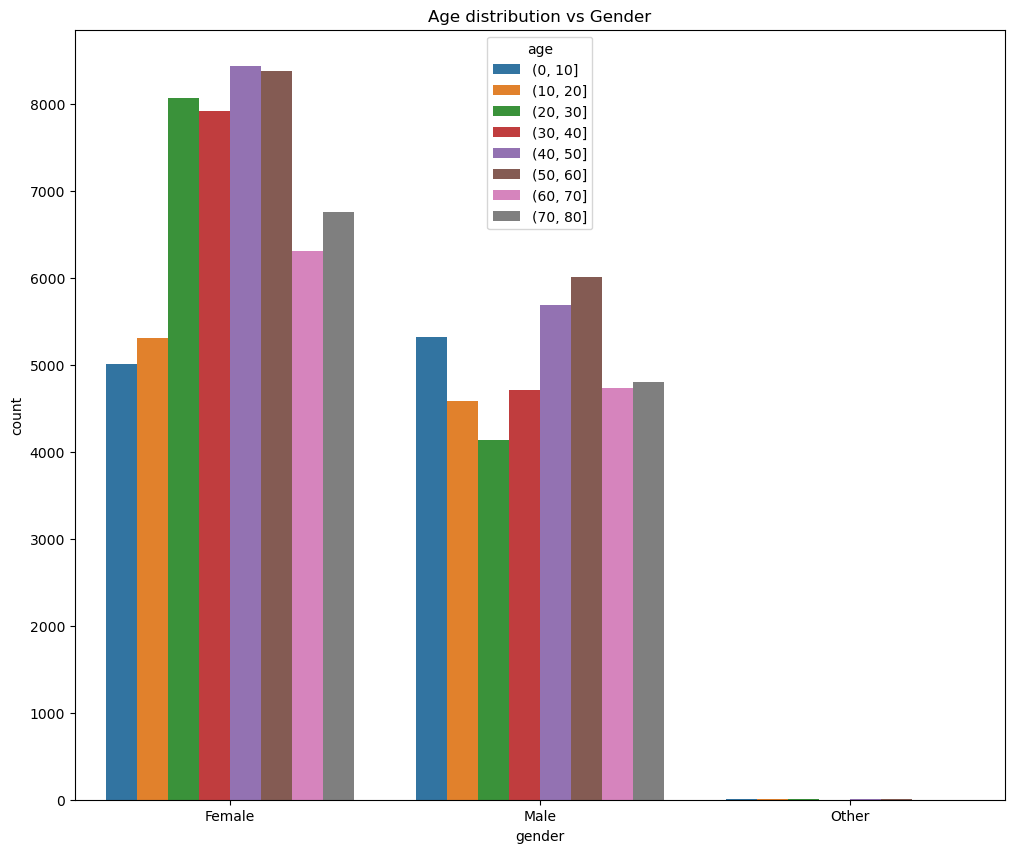

In [11]:
# Let's pick a sample for our EDA
#sample_df = df.sample(n=30000, random_state=42)

# Age distribution
age_group = pd.cut(df['age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12,10))
sns.countplot(x=df['gender'], data = df, hue= age_group)
plt.title('Age distribution vs Gender')
plt.show()

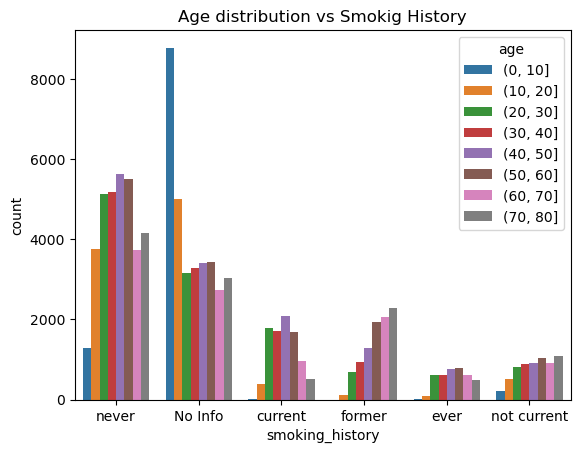

In [12]:
sns.countplot(x=df['smoking_history'], data = df, hue= age_group)
plt.title('Age distribution vs Smokig History')
plt.show()

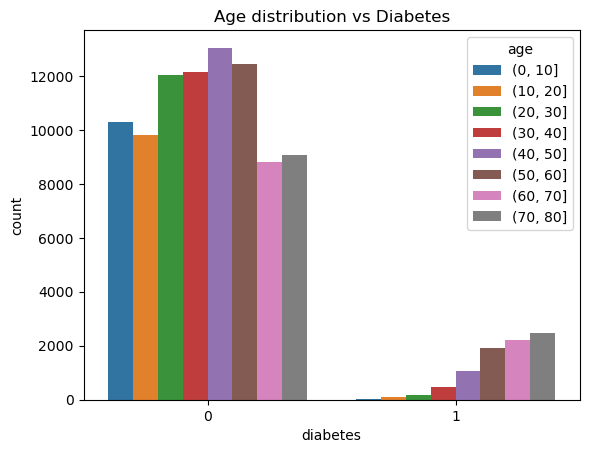

In [13]:
sns.countplot(x=df['diabetes'], data = df, hue= age_group)
plt.title('Age distribution vs Diabetes')
plt.show()

In [14]:
# Create a copy of the dataFrame
data = df.copy()
# Let's encode our dataset to make sure everything works for our model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.loc[:,'gender'] = le.fit_transform(data['gender'])
data.loc[:,'smoking_history'] = le.fit_transform(data['smoking_history'])

In [15]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [16]:
# Splitting our data into training and testing
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [17]:
print(f'Shape of X: {X.shape}\nShape of y: {y.shape}')

Shape of X: (96146, 8)
Shape of y: (96146,)


In [18]:
# First split: Separate out a training set and a temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)

In [19]:
# Second split: Divide the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [20]:
print(f'Shape of X: {X_train.shape}\nShape of y: {y_train.shape}')

Shape of X: (57687, 8)
Shape of y: (57687,)


### Build Our Tensorflow Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2), # Droppout layer to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid') # Output layer for binary classification  
])

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Train the model
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(X_val,y_val), callbacks=[stopping])

Epoch 1/10
1803/1803 [==============================] - 1s 559us/step - loss: 0.9883 - accuracy: 0.8628 - val_loss: 0.2887 - val_accuracy: 0.9125
Epoch 2/10
1803/1803 [==============================] - 1s 515us/step - loss: 0.2592 - accuracy: 0.9186 - val_loss: 0.2390 - val_accuracy: 0.9204
Epoch 3/10
1803/1803 [==============================] - 1s 517us/step - loss: 0.2302 - accuracy: 0.9250 - val_loss: 0.2264 - val_accuracy: 0.9211
Epoch 4/10
1803/1803 [==============================] - 1s 512us/step - loss: 0.2101 - accuracy: 0.9308 - val_loss: 0.2116 - val_accuracy: 0.9282
Epoch 5/10
1803/1803 [==============================] - 1s 515us/step - loss: 0.1914 - accuracy: 0.9356 - val_loss: 0.1923 - val_accuracy: 0.9272
Epoch 6/10
1803/1803 [==============================] - 1s 520us/step - loss: 0.1736 - accuracy: 0.9409 - val_loss: 0.2280 - val_accuracy: 0.9224


### Model Evaluation

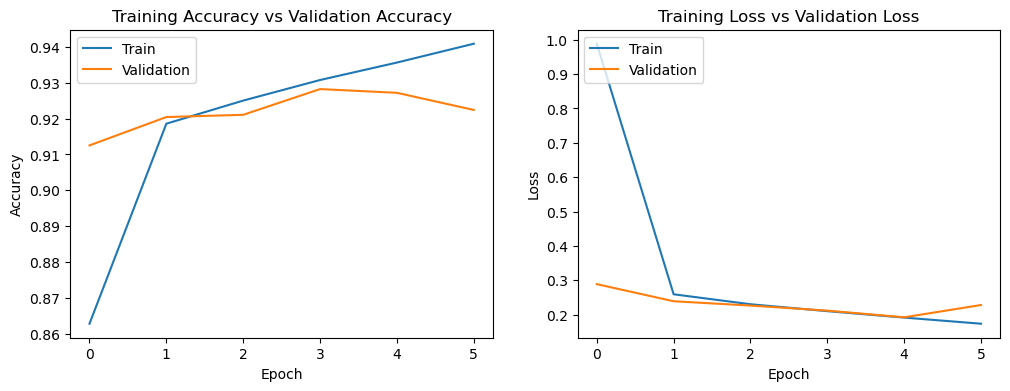

In [25]:
# Evaluating and Visualizing the Model Performance
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [26]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

601/601 [==============================] - 0s 314us/step - loss: 0.1889 - accuracy: 0.9298
Test Accuracy: 92.98%


In [27]:
# Predictions
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

601/601 [==============================] - 0s 231us/step


In [28]:
# Importing necessary libraries from sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17553
           1       1.00      0.19      0.33      1677

    accuracy                           0.93     19230
   macro avg       0.96      0.60      0.64     19230
weighted avg       0.93      0.93      0.91     19230



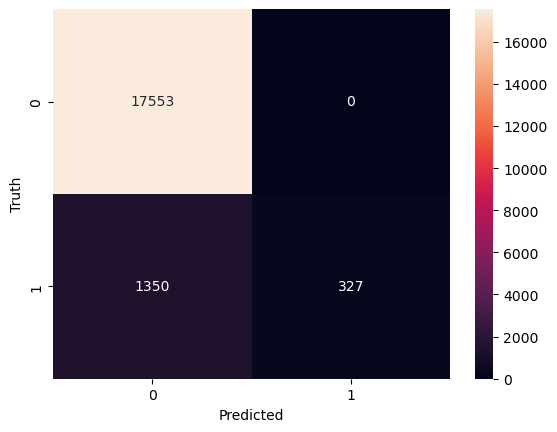

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()